# Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
eta

## Stress Intensity Factors
In this section, the far field stresses will be represented in terms of Stress Intensity factors. The schematics assume that we have a far field stress in the horizontal direction represented as $\sigma_x$ with respect to an angled crack represent by angle $\beta$ with respect to this horizontal boundary condition.The stress field in this case will be given as:
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
\sigma_{X} & \eta \sigma_{X} \\
\eta \sigma_{X} & 0
\end{array}
\right]
\end{align}
and the rotated stress field depicted in figure below is shown as:
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right]
\end{align}
However, to transform the global stress field into local with respect to the angle $\beta$ can be done with the help of rotation matrix. Hence,
\begin{align}
R_{\beta} = 
\left[
\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}
\right]
\end{align}
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right] = 
R_{\beta}^T \sigma_{ij} R_{\beta}
\end{align}
In order to convert the local stress field into SIF's to take into account crack length: 
\begin{gather*}
K_I = \sqrt{\pi a} \sigma_{n}\\
K_{II} = \sqrt{\pi a} \sigma_{np}
\end{gather*}
Here, $K_I$ represents the mode I opening failure whereas, $K_{II}$ depicts the sliding failure. The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

<img src="transformationofstressfield.png" width="300"/>

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

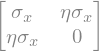

In [4]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

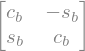

In [5]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

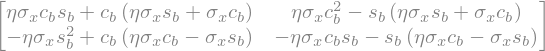

In [6]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

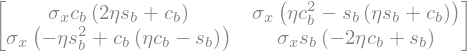

In [7]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [8]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [9]:
#a = sp.simplify(SIF_field)
#l = (Rot.T).inv() * a * Rot.inv()
#l

In [10]:
#sp.simplify(l)

In [11]:
#params1 = {beta:45*np.pi/180}

In [12]:
#K_I_ = K_I#.subs(params)
#K_II_ = K_II#.subs(params)
#K_I_, K_II_

In [13]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [14]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

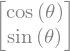

In [15]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress at the Crack tip
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma^{tip}_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}} = 
\left[
\begin{array}{cc}
\sigma_{x} & \sigma_{xy} \\
\sigma_{xy} &  \sigma_{y}
\end{array}
\right]
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

<img src="Transformationfigure.png" width="500"/>

## Angular Function

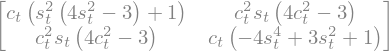

In [16]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

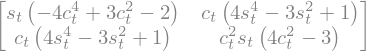

In [17]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

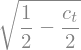

In [18]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

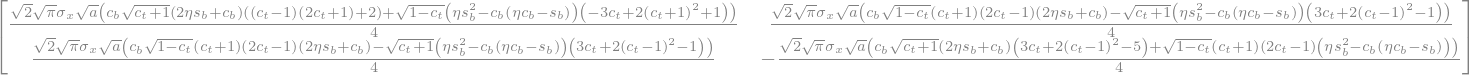

In [19]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h))
sigma_tip_ij_

## Tip Stress Transformation
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
R_{\theta} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma^{tip(\theta)}_{ij} = R_{\theta}^T \sigma^{tip}_{ij} R_{\theta} =
\left[
\begin{array}{cc}
\sigma_{\rho} & \sigma_{\rho \theta} \\
\sigma_{\rho \theta} &  \sigma_{\theta}
\end{array} \right]
\end{align}

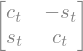

In [20]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_theta

In [21]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_;

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

In [22]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)
sig_tip_theta_ij_sub;

In [23]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim;

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta}$ is maximum depicting principal stress than $\sigma_{\rho \theta}$ becomes:  
\begin{gather*}
\sigma_{\rho \theta} = 0
\end{gather*}

In [24]:
#sig_tip_theta_sim[1,0].subs(params)

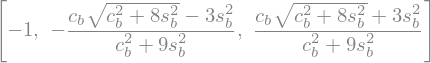

In [25]:
params = {eta : 0}
theta_sigma_xy0 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
theta_sigma_xy0

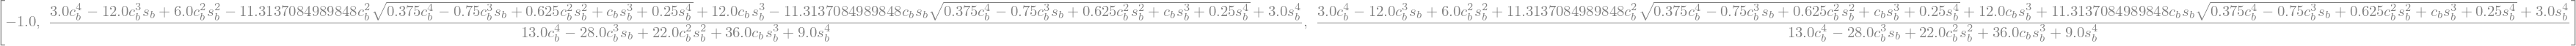

In [26]:
params_ = {sigma_x : 1, eta : 0.5} 
theta_sigma_xy1 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
theta_sigma_xy1

In [27]:
#sp.simplify(theta_sigma_xy1[2])

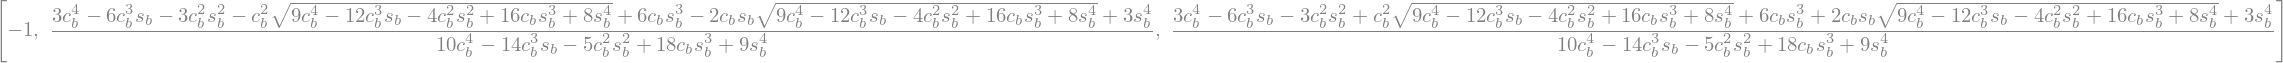

In [28]:
params_2 = {sigma_x : 1, eta : 1}
theta_sigma_xy2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_2), c_t)
theta_sigma_xy2

In [29]:
theta_sig_xy0 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy0_ = sp.acos(theta_sig_xy0)
get_theta_sig_xy0 = sp.lambdify((beta), theta_sig_xy0_, 'numpy')
get_theta_sig_xy0

<function _lambdifygenerated(Dummy_203)>

In [30]:
theta_sig_xy1 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_ = sp.acos(theta_sig_xy1)
get_theta_sig_xy1 = sp.lambdify((beta), theta_sig_xy1_, 'numpy')
get_theta_sig_xy1

<function _lambdifygenerated(Dummy_204)>

In [31]:
theta_sig_xy2 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_ = sp.acos(theta_sig_xy2)
get_theta_sig_xy2 = sp.lambdify((beta), theta_sig_xy2_, 'numpy')
get_theta_sig_xy2

<function _lambdifygenerated(Dummy_205)>

<IPython.core.display.Javascript object>


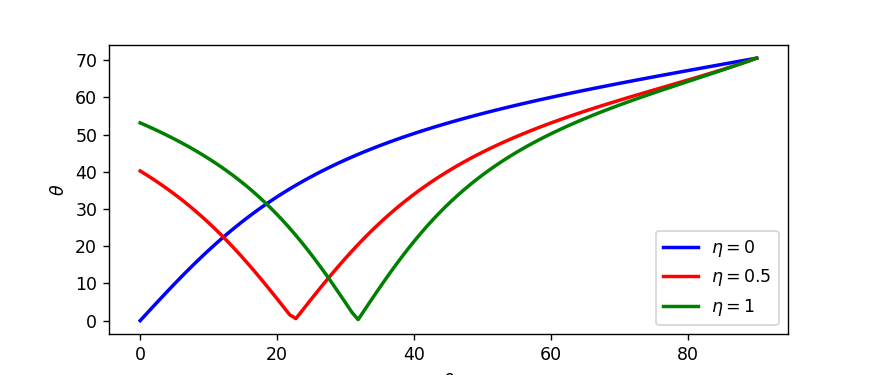

In [32]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0 = np.linspace(0, 90 * np.pi/180, 100)
#beta_1 = np.linspace(0, 90 * np.pi/180, 100)
#beta_2 = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_xy0 = get_theta_sig_xy0(beta_0)
theta_sig_xy1 = get_theta_sig_xy1(beta_0)
theta_sig_xy2 = get_theta_sig_xy2(beta_0)
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0$')
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy1 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5$')
ax1.plot(beta_0 * 180/np.pi, theta_sig_xy2 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("plotMTSvaryingeta.pdf", bbox_inches='tight')

In [33]:
theta_sig_xy1 * 180/ np.pi 

array([40.20781872, 39.17207929, 38.09646946, 36.97887777, 35.81715961,
       34.60915856, 33.35273364, 32.04579372, 30.68633986, 29.27251644,
       27.80267177, 26.2754285 , 24.6897634 , 23.04509557, 21.341381  ,
       19.5792101 , 17.75990341, 15.8855995 , 13.95932739, 11.98505542,
        9.96770806,  7.91314332,  5.82808543,  3.72001078,  1.59698951,
        0.53251052,  2.65984605,  4.7764326 ,  6.87397472,  8.94467679,
       10.98142136, 12.97790596, 14.92873384, 16.82945837, 18.67658519,
       20.46753826, 22.20059824, 23.87482129, 25.48994644, 27.04629821,
       28.54469017, 29.98633313, 31.37275104, 32.7057057 , 33.9871314 ,
       35.21907899, 36.40366929, 37.54305483, 38.63938916, 39.69480261,
       40.71138375, 41.6911655 , 42.63611516, 43.54812764, 44.4290213 ,
       45.2805358 , 46.10433159, 46.9019907 , 47.6750184 , 48.42484563,
       49.15283196, 49.86026885, 50.54838322, 51.21834111, 51.87125146,
       52.50816986, 53.13010235, 53.73800914, 54.33280826, 54.91

In [34]:
theta_sig_xy2 * 180/ np.pi 

array([53.13010235, 52.3925753 , 51.6334946 , 50.85121993, 50.04400746,
       49.21000186, 48.34722815, 47.45358377, 46.52683095, 45.56458976,
       44.56433226, 43.52337829, 42.4388936 , 41.30789131, 40.12723774,
       38.89366421, 37.60378639, 36.25413347, 34.84118948, 33.36144962,
       31.81149447, 30.18808519, 28.48828233, 26.70959002, 24.85012609,
       22.90881587, 20.8856044 , 18.78167706, 16.59967377, 14.34387641,
       12.02034518,  9.63697748,  7.20346527,  4.73113362,  2.23265568,
        0.27834521,  2.78777833,  5.28161189,  7.74639387, 10.16971912,
       12.5406041 , 14.84974488, 17.08965131, 19.25466541, 21.34088303,
       23.34600399, 25.26913668, 27.11058091, 28.87160803, 30.55425213,
       32.16112111, 33.6952323 , 35.15987392, 36.55849172, 37.89459871,
       39.17170514, 40.39326576, 41.5626414 , 42.68307221, 43.75766012,
       44.78935854, 45.78096755, 46.73513335, 47.65435065, 48.54096733,
       49.39719057, 50.225094  , 51.02662539, 51.80361467, 52.55

In [35]:
beta_0 * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

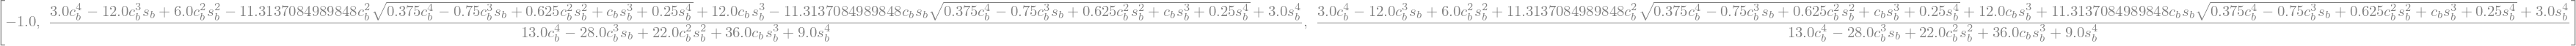

In [36]:
params_x2 = {sigma_x : 2, eta : 0.5}
theta_sigma_x2 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x2), c_t)
theta_sigma_x2

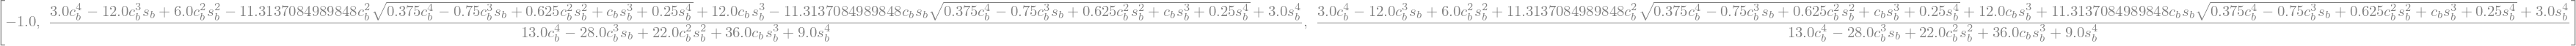

In [37]:
params_x3 = {sigma_x : 3, eta : 0.5}
theta_sigma_x3 = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_x3), c_t)
theta_sigma_x3

In [38]:
beta = sp.Symbol(r'\beta', nonnegative = True)
theta_sig_x2 = theta_sigma_x2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x2_ = sp.acos(theta_sig_x2)
get_theta_sig_x2 = sp.lambdify((beta), theta_sig_x2_, 'numpy')
get_theta_sig_x2

<function _lambdifygenerated(Dummy_256)>

In [39]:
theta_sig_x3 = theta_sigma_x3[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_x3_ = sp.acos(theta_sig_x3)
get_theta_sig_x3 = sp.lambdify((beta), theta_sig_x3_, 'numpy')
get_theta_sig_x3

<function _lambdifygenerated(Dummy_257)>

<IPython.core.display.Javascript object>


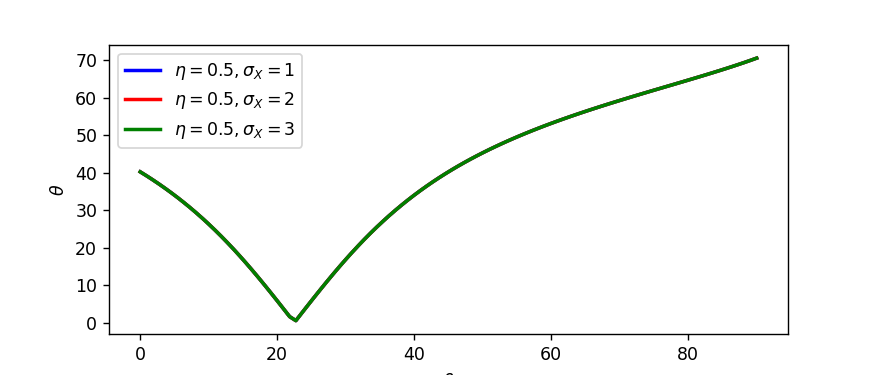

In [40]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_ = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_x1 = get_theta_sig_xy1(beta_)
theta_sig_x2 = get_theta_sig_x2(beta_)
theta_sig_x3 = get_theta_sig_x3(beta_)
ax1.plot(beta_ * 180/np.pi, theta_sig_x1 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x2 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 2$')
ax1.plot(beta_ * 180/np.pi, theta_sig_x3 * 180/ np.pi, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 3$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("plotMTSvaryingsigma_x.pdf", bbox_inches='tight')

## Mixity Parameter

Mode mixity is given as: 
\begin{gather*}
    M_e = \frac{2}{\pi} \arctan \left(\frac{K_I}{K_{II}} \right)
\end{gather*}
where $M_e = 0$ depicts the pure mode II failure and $M_e = 1$ highlights a pure mode I failure.

In [41]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

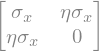

In [42]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x], #eta * sigma_x
                      [eta * sigma_x, 0]])
sigma_ij

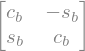

In [43]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

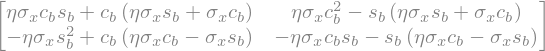

In [44]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

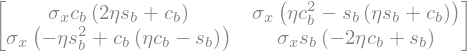

In [45]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [46]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

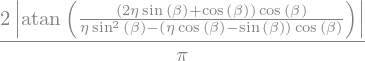

In [124]:
M_e = (2 / sp.pi) * sp.atan(K_I/K_II)
M_e_eta0 = sp.Abs(M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
M_e_eta0

In [125]:
get_M_e = sp.lambdify((eta, beta), M_e_eta0, 'numpy')
get_M_e

<function _lambdifygenerated(Dummy_295, Dummy_296)>

In [126]:
theta_sig_xy0 = theta_sigma_xy0[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin( beta)) #90 * np.pi / 180 - 
theta_sig_xy0_ = sp.acos(theta_sig_xy0)
get_theta_sig_xy0_ = sp.lambdify((beta), theta_sig_xy0_, 'numpy')
get_theta_sig_xy0_

<function _lambdifygenerated(Dummy_297)>

In [127]:
theta_sig_xy1 = theta_sigma_xy1[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy1_ = sp.acos(theta_sig_xy1)
get_theta_sig_xy1_ = sp.lambdify((beta), theta_sig_xy1_, 'numpy')
get_theta_sig_xy1_

<function _lambdifygenerated(Dummy_298)>

In [128]:
theta_sig_xy2 = theta_sigma_xy2[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_xy2_ = sp.acos(theta_sig_xy2)
get_theta_sig_xy2_ = sp.lambdify((beta), theta_sig_xy2_, 'numpy')
get_theta_sig_xy2_

<function _lambdifygenerated(Dummy_299)>

<IPython.core.display.Javascript object>


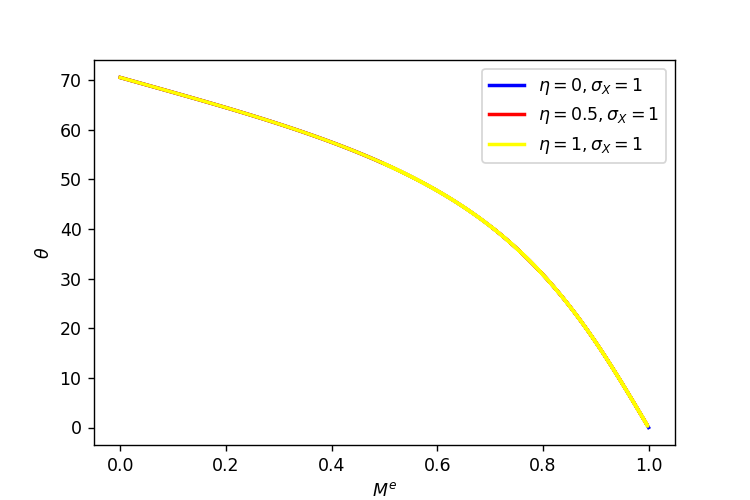

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [129]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_0 = np.linspace(0, 90 * np.pi/180, 100)
theta_sig_xy0 = get_theta_sig_xy0_(beta_0)
theta_sig_xy1 = get_theta_sig_xy1_(beta_0)
theta_sig_xy2 = get_theta_sig_xy2_(beta_0)
M_e_xy0 = get_M_e(eta_0,beta_0)
M_e_xy1 = get_M_e(eta_05, beta_0)
M_e_xy2 = get_M_e(eta_1, beta_0)
ax1.plot(M_e_xy0, theta_sig_xy0 * 180/ np.pi, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(M_e_xy1, theta_sig_xy1 * 180/ np.pi, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(M_e_xy2, theta_sig_xy2 * 180/ np.pi, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("thetaMe.pdf", bbox_inches='tight')

In [119]:
theta_sig_xy1 * 180/ np.pi

array([70.52877937, 69.93296504, 69.35576985, 68.79466257, 68.24743129,
       67.71212866, 67.18702749, 66.67058464, 66.16141128, 65.6582483 ,
       65.15994581, 64.66544588, 64.17376801, 63.68399665, 63.19527058,
       62.70677364, 62.21772669, 61.72738051, 61.23500948, 60.73990597,
       60.2413752 , 59.73873054, 59.23128924, 58.71836832, 58.1992808 ,
       57.67333198, 57.13981601, 56.59801233, 56.0471824 , 55.48656625,
       54.91537915, 54.33280826, 53.73800914, 53.13010235, 52.50816986,
       51.87125146, 51.21834111, 50.54838322, 49.86026885, 49.15283196,
       48.42484563, 47.6750184 , 46.9019907 , 46.10433159, 45.2805358 ,
       44.4290213 , 43.54812764, 42.63611516, 41.6911655 , 40.71138375,
       39.69480261, 38.63938916, 37.54305483, 36.40366929, 35.21907899,
       33.9871314 , 32.7057057 , 31.37275104, 29.98633313, 28.54469017,
       27.04629821, 25.48994644, 23.87482129, 22.20059824, 20.46753826,
       18.67658519, 16.82945837, 14.92873384, 12.97790596, 10.98

In [79]:
M_e_xy2

array([5.00000000e-01, 5.15112077e-01, 5.30147742e-01, 5.45110579e-01,
       5.60004029e-01, 5.74831397e-01, 5.89595862e-01, 6.04300483e-01,
       6.18948207e-01, 6.33541874e-01, 6.48084226e-01, 6.62577910e-01,
       6.77025488e-01, 6.91429437e-01, 7.05792158e-01, 7.20115981e-01,
       7.34403166e-01, 7.48655912e-01, 7.62876359e-01, 7.77066593e-01,
       7.91228646e-01, 8.05364508e-01, 8.19476122e-01, 8.33565392e-01,
       8.47634185e-01, 8.61684338e-01, 8.75717652e-01, 8.89735907e-01,
       9.03740854e-01, 9.17734226e-01, 9.31717736e-01, 9.45693082e-01,
       9.59661948e-01, 9.73626010e-01, 9.87586933e-01, 9.98453619e-01,
       9.84493988e-01, 9.70532513e-01, 9.56567531e-01, 9.42597374e-01,
       9.28620365e-01, 9.14634817e-01, 9.00639029e-01, 8.86631283e-01,
       8.72609844e-01, 8.58572953e-01, 8.44518827e-01, 8.30445656e-01,
       8.16351598e-01, 8.02234778e-01, 7.88093282e-01, 7.73925158e-01,
       7.59728408e-01, 7.45500986e-01, 7.31240796e-01, 7.16945685e-01,
      

In [80]:
M_e_xy1

array([7.04832765e-01, 7.16941397e-01, 7.29025816e-01, 7.41087402e-01,
       7.53127479e-01, 7.65147326e-01, 7.77148175e-01, 7.89131215e-01,
       8.01097599e-01, 8.13048442e-01, 8.24984827e-01, 8.36907806e-01,
       8.48818404e-01, 8.60717620e-01, 8.72606429e-01, 8.84485787e-01,
       8.96356630e-01, 9.08219876e-01, 9.20076429e-01, 9.31927181e-01,
       9.43773010e-01, 9.55614786e-01, 9.67453371e-01, 9.79289622e-01,
       9.91124388e-01, 9.97041480e-01, 9.85207137e-01, 9.73371735e-01,
       9.61534424e-01, 9.49694350e-01, 9.37850656e-01, 9.26002475e-01,
       9.14148933e-01, 9.02289146e-01, 8.90422215e-01, 8.78547231e-01,
       8.66663265e-01, 8.54769373e-01, 8.42864590e-01, 8.30947928e-01,
       8.19018375e-01, 8.07074895e-01, 7.95116419e-01, 7.83141848e-01,
       7.71150050e-01, 7.59139854e-01, 7.47110048e-01, 7.35059379e-01,
       7.22986546e-01, 7.10890196e-01, 6.98768923e-01, 6.86621261e-01,
       6.74445683e-01, 6.62240590e-01, 6.50004314e-01, 6.37735106e-01,
      

In [81]:
M_e_xy0

array([1.00000000e+00, 9.89898990e-01, 9.79797980e-01, 9.69696970e-01,
       9.59595960e-01, 9.49494949e-01, 9.39393939e-01, 9.29292929e-01,
       9.19191919e-01, 9.09090909e-01, 8.98989899e-01, 8.88888889e-01,
       8.78787879e-01, 8.68686869e-01, 8.58585859e-01, 8.48484848e-01,
       8.38383838e-01, 8.28282828e-01, 8.18181818e-01, 8.08080808e-01,
       7.97979798e-01, 7.87878788e-01, 7.77777778e-01, 7.67676768e-01,
       7.57575758e-01, 7.47474747e-01, 7.37373737e-01, 7.27272727e-01,
       7.17171717e-01, 7.07070707e-01, 6.96969697e-01, 6.86868687e-01,
       6.76767677e-01, 6.66666667e-01, 6.56565657e-01, 6.46464646e-01,
       6.36363636e-01, 6.26262626e-01, 6.16161616e-01, 6.06060606e-01,
       5.95959596e-01, 5.85858586e-01, 5.75757576e-01, 5.65656566e-01,
       5.55555556e-01, 5.45454545e-01, 5.35353535e-01, 5.25252525e-01,
       5.15151515e-01, 5.05050505e-01, 4.94949495e-01, 4.84848485e-01,
       4.74747475e-01, 4.64646465e-01, 4.54545455e-01, 4.44444444e-01,
      

In [82]:
beta_0 * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

## Normalized Parameters

The critical mode I stress intensity factor is given as:
\begin{gather*}
    K_{Ic} = \sigma_X \sqrt{\pi a}
\end{gather*}
Now, the stress intensity factors will be normalized with respect to the $K_{Ic}$ to visualize the failure locus.

In [58]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [59]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

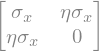

In [60]:
sigma_ij = sp.Matrix([[sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

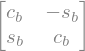

In [61]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

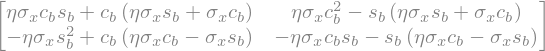

In [62]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

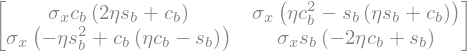

In [63]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [64]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [108]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_I_

In [109]:
get_Norm_K_I = sp.lambdify((eta, beta), Norm_K_I_, 'numpy')
get_Norm_K_I

<function _lambdifygenerated(Dummy_283, Dummy_284)>

In [110]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = sp.Abs(Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
Norm_K_II_

In [111]:
get_Norm_K_II = sp.lambdify((eta, beta), Norm_K_II_, 'numpy')
get_Norm_K_II

<function _lambdifygenerated(Dummy_285, Dummy_286)>

<IPython.core.display.Javascript object>


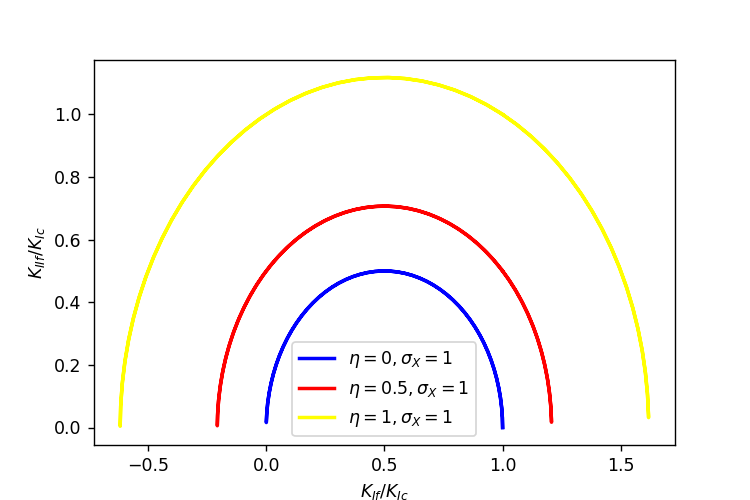

In [130]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 180 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(eta_0, beta_)
K_II_K_Ic = get_Norm_K_II(eta_0, beta_)
K_I_K_Ic_ = get_Norm_K_I(eta_05, beta_)
K_II_K_Ic_ = get_Norm_K_II(eta_05, beta_)
K_I_K_Ic_1 = get_Norm_K_I(eta_1, beta_)
K_II_K_Ic_1 = get_Norm_K_II(eta_1, beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_, K_II_K_Ic_, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(K_I_K_Ic_1, K_II_K_Ic_1, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()
_.savefig("Failurelocus.pdf", bbox_inches='tight')

## Variation Of SIFs against $\beta$

In [70]:
params = {sigma_x : 1, a : 1}
K_I_ = K_I.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
K_I_

In [71]:
K_II_ = sp.Abs(K_II.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
K_II_

In [72]:
get_K_I = sp.lambdify((eta, beta), K_I_, 'numpy')
get_K_I

<function _lambdifygenerated(Dummy_267, Dummy_268)>

In [73]:
get_K_II = sp.lambdify((eta, beta), K_II_, 'numpy')
get_K_II

<function _lambdifygenerated(Dummy_269, Dummy_270)>

<IPython.core.display.Javascript object>


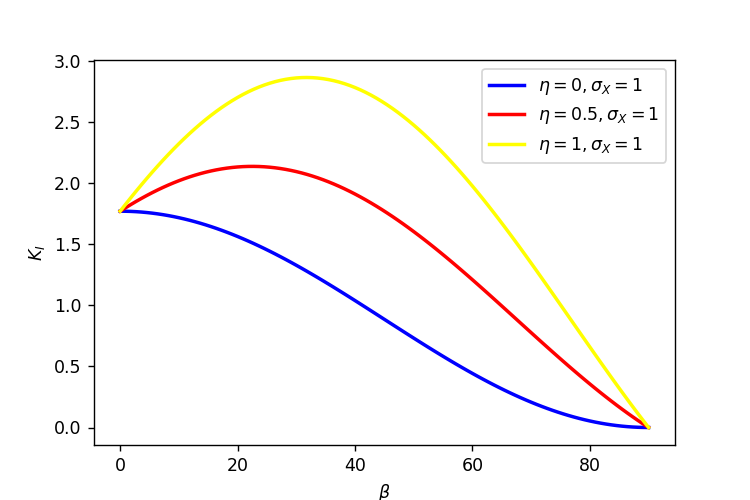

In [131]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_1 = get_K_I(eta_0, beta_)
K_I_2 = get_K_I(eta_05, beta_)
K_I_3 = get_K_I(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_I_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_I_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{I}$')
ax1.legend()
_.savefig("KIbeta.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


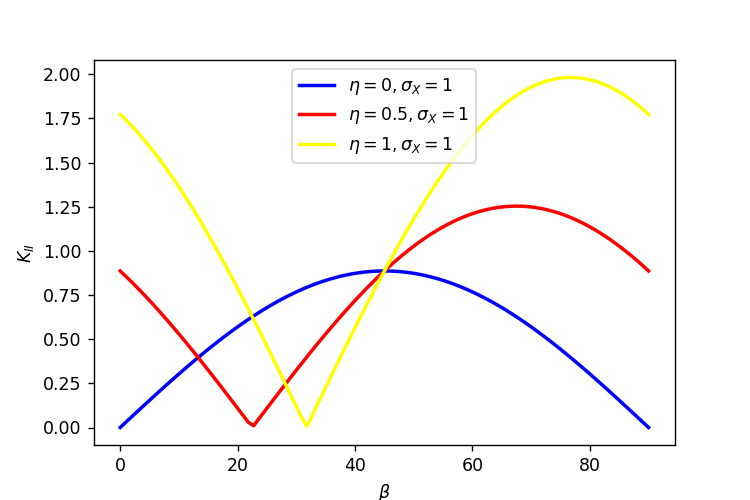

In [132]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_II_1 = get_K_II(eta_0, beta_)
K_II_2 = get_K_II(eta_05, beta_)
K_II_3 = get_K_II(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_II_1, color='blue', lw=2, label = r'$\eta = 0, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_2, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
ax1.plot(beta_ * 180/np.pi, K_II_3, color='yellow', lw=2, label = r'$\eta = 1, \sigma_X = 1$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{II}$')
ax1.legend()
_.savefig("KIIbeta.pdf", bbox_inches='tight')

In [76]:
K_II_2

array([0.88622693, 0.8576626 , 0.82823468, 0.7979728 , 0.76690742,
       0.73506984, 0.7024921 , 0.66920701, 0.63524809, 0.60064953,
       0.56544616, 0.52967344, 0.49336738, 0.45656455, 0.41930199,
       0.38161723, 0.34354821, 0.30513327, 0.26641108, 0.22742064,
       0.18820121, 0.14879228, 0.10923352, 0.06956478, 0.02982599,
       0.00994283, 0.04970164, 0.08941041, 0.12902914, 0.16851796,
       0.20783709, 0.24694695, 0.28580815, 0.32438157, 0.36262836,
       0.40051002, 0.4379884 , 0.47502576, 0.51158481, 0.54762873,
       0.58312125, 0.6180266 , 0.65230966, 0.6859359 , 0.71887146,
       0.75108317, 0.78253861, 0.8132061 , 0.84305476, 0.87205453,
       0.90017622, 0.92739151, 0.95367299, 0.9789942 , 1.00332965,
       1.02665484, 1.04894627, 1.07018149, 1.09033914, 1.10939891,
       1.12734161, 1.14414917, 1.15980466, 1.17429234, 1.1875976 ,
       1.19970705, 1.21060849, 1.22029096, 1.2287447 , 1.23596119,
       1.24193318, 1.24665465, 1.25012084, 1.25232826, 1.25327

In [77]:
beta_ * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 28900, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          a_0: 16, #mm
          f_1: 1.123,
          COD : 0.0094, ##mm
          K_Ic : 26.3 #N/mm2
         }

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
G = (sigma_x_ * pi * a * f_1**2)/E
G

In [ ]:
G_ = G.subs(params)
G_

In [ ]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha = (pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = sp.simplify(alpha.subs(params))
alpha_

In [ ]:
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_1_ = d_1.subs(params)
d_2_ = d_2.subs(params)
d_2_, d_1_

In [ ]:
#get_d_1 = sp.lambdify((a), d_1_, 'numpy')
#get_d_1

In [ ]:
#get_d_2 = sp.lambdify((a), d_2_, 'numpy')
#get_d_2

In [ ]:
beta_2 = (K_Ic**2 * (alpha_ * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))/(d_1 - ((alpha_-1)/alpha_))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
#get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
#get_beta_2

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
#sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(16, 100, 100)
a_g = np.linspace(0, 100, 100)
R = get_R(a) 
#R_I_c = R_Ic_
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2, label= 'R-curve')
ax1.plot(a_g , G, color='blue', lw=2, label= 'G')
#ax1.plot(a , R_I_c, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [ ]:
R

In [ ]:
G